## 1.1 Import libraries 

In [55]:
import pandas as pd 
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

## 1.2 Import raw data from IMF

In [56]:
spain_raw = pd.read_excel('spain_data.xlsx', header=2)
# rename first column to 'date'
spain_raw.rename(columns={'Unnamed: 0': 'date'}, inplace=True)  

In [57]:
us_raw = pd.read_excel('us_data.xlsx', header=2)
# rename first column to 'date'
us_raw.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [58]:
merged_df = pd.merge(spain_raw, us_raw, on='date')

## 2. Data cleaning

### 2.1 Rename columns for easy reading 

In [59]:
merged_df.rename(columns={'Economic Activity, Industrial Production, Index': 'spain_industrial_production', 
                           'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate': 'spain_exchange_rates_per_USD',
                           'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_x': 'spain_international_reserves_liquidity',
                           'Prices, Consumer Price Index, All items, Index_x': 'spain_consumer_prices',
                           'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_y': 'us_international_reserves_liquidity', 
                           'Prices, Consumer Price Index, All items, Index_y': 'us_consumer_prices'}, inplace=True)

In [60]:
# format the month and year variable in a date format 
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%b %Y')

### 2.2 Identify outliers

We have employed 3 methods to determine if there are any outliers in our dataset.

##### 2.2.1 Using IQR and box plots  
- Calculating the First and the Third Quartile and the IQR as the difference between the 2 quartiles
- Using the IQR, we calculate the lower and upper bound for outlier cutoff
- Identify outliers that fall outside of these bounds

In [61]:
columns = ['spain_industrial_production', 'spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'spain_consumer_prices', 'us_international_reserves_liquidity', 'us_consumer_prices']

outliers_dict = {}

for col in columns:
    # Calculate quartiles and IQR
    q25, q75 = np.percentile(merged_df[col], 25), np.percentile(merged_df[col], 75)
    iqr = q75 - q25
    
    # Calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # Identify outliers for each column
    outliers = merged_df[(merged_df[col] < lower) | (merged_df[col] > upper)]
    
    # Store outlier months in the dictionary
    outliers_dict[col] = outliers['date'].tolist()

# Print the outlier months for each column
for col, outliers_months in outliers_dict.items():
    print(f'Outliers for column "{col}": {outliers_months}')


Outliers for column "spain_industrial_production": []
Outliers for column "spain_exchange_rates_per_USD": [Timestamp('1985-02-01 00:00:00'), Timestamp('1985-03-01 00:00:00')]
Outliers for column "spain_international_reserves_liquidity": [Timestamp('1987-11-01 00:00:00'), Timestamp('1987-12-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1988-02-01 00:00:00'), Timestamp('1988-03-01 00:00:00'), Timestamp('1988-04-01 00:00:00'), Timestamp('1988-05-01 00:00:00'), Timestamp('1988-06-01 00:00:00'), Timestamp('1988-07-01 00:00:00'), Timestamp('1988-08-01 00:00:00'), Timestamp('1988-09-01 00:00:00'), Timestamp('1988-10-01 00:00:00'), Timestamp('1988-11-01 00:00:00'), Timestamp('1988-12-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('1989-02-01 00:00:00'), Timestamp('1989-03-01 00:00:00'), Timestamp('1989-04-01 00:00:00'), Timestamp('1989-05-01 00:00:00'), Timestamp('1989-06-01 00:00:00'), Timestamp('1989-07-01 00:00:00'), Timestamp('1989-08-01 00:00:00'), Timestamp('198

- For each dataset with potential identified outliers, we plot a boxplot for visualisation

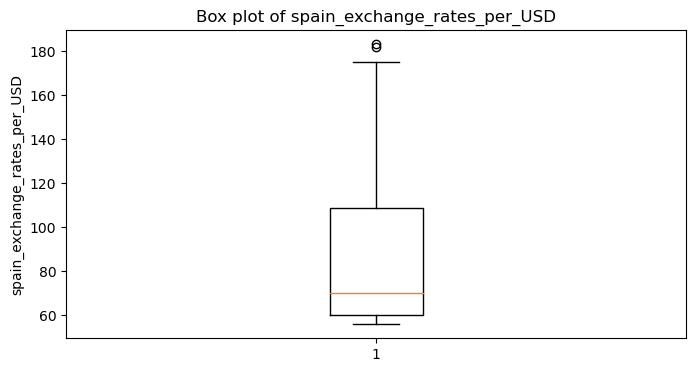

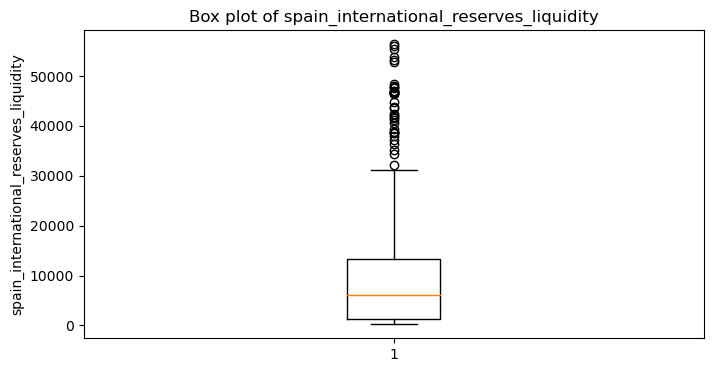

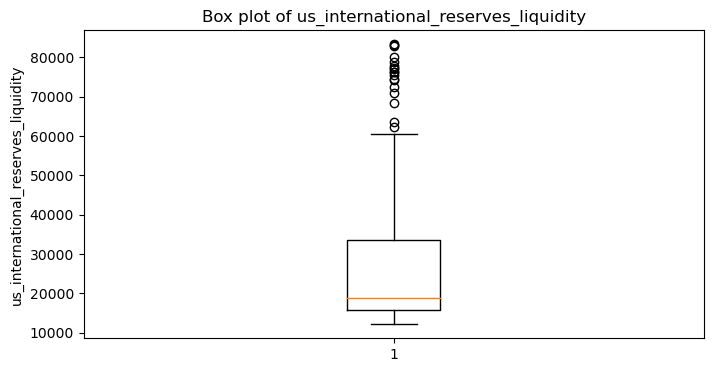

In [62]:
# create a box plot for each column 
bp_columns = ['spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'us_international_reserves_liquidity']
for col in bp_columns:
    plt.figure(figsize=(8,4))
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.boxplot(merged_df[col])
    plt.show()

Conclusion: 
- We confirm that the identified datapoints spain_exchange_rates_per_USD of are outside of upper and lower bounds. They could potentially be outliers and we will confirm this
- However, for spain_international_reserves_liquidity and us_international_reserves_liquidity, given that there are many datapoints outside the chosen upper and lower bounds, it is likely the datapoints are representative of the general trend and we will confirm this

##### 2.2.2 Identifying if there are any values more than 3 standard deviations from the mean  
- We identify potential outliers for the flagged datasets using the 3 standard deviation (3 SD) rule

In [79]:
for col in columns:
    mean = merged_df[col].mean()
    std = merged_df[col].std()
    outliers = [x for x in merged_df[col] if (x > mean + 3*std) or (x < mean - 3*std)]
    print(f'Identified outliers for {col}: {len(outliers)}')

Identified outliers for spain_industrial_production: 0
Identified outliers for spain_exchange_rates_per_USD: 0
Identified outliers for spain_international_reserves_liquidity: 6
Identified outliers for spain_consumer_prices: 0
Identified outliers for us_international_reserves_liquidity: 14
Identified outliers for us_consumer_prices: 0


Conclusion:
- As we run the 3 standard deviation test, no new potential otliers were identified other than the preciously identified potential outliers

##### 2.2.3 Plotting each variable on a line graph to visually check for outliers  
- Plotting line graphs for all the datasets to visually check for outliers
- Ensure the identified potential outliers are explainable and in line with general trends

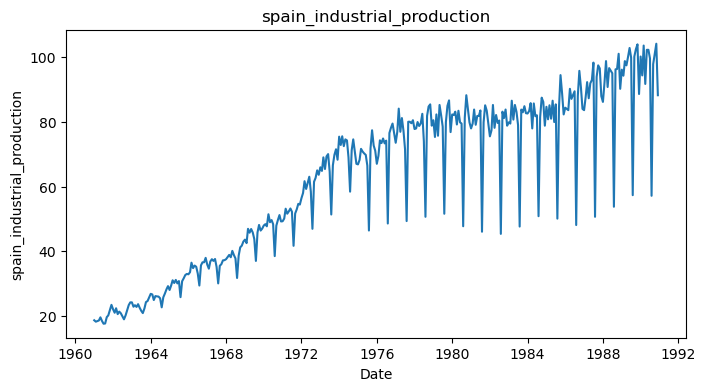

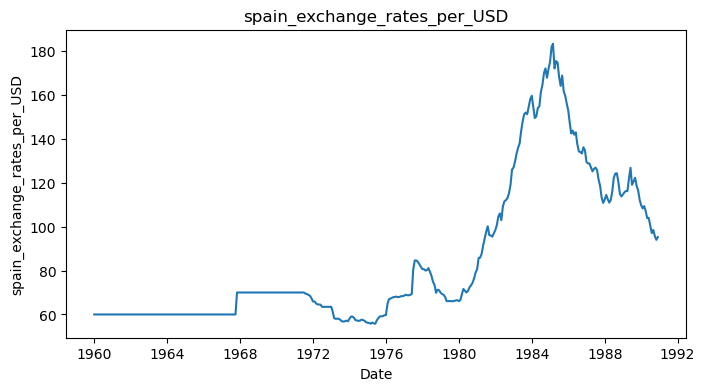

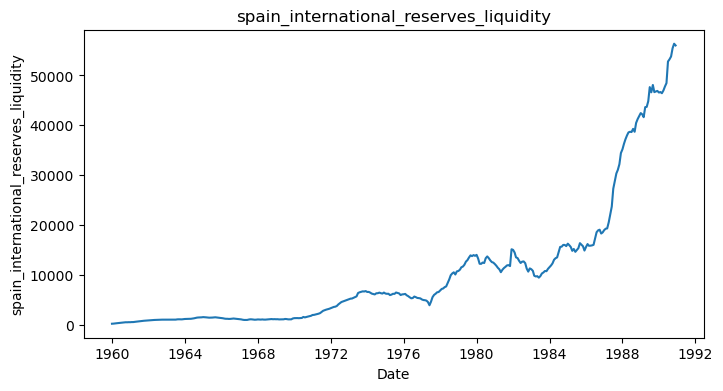

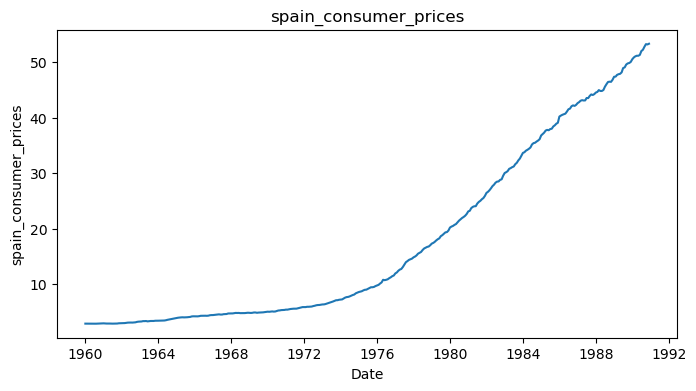

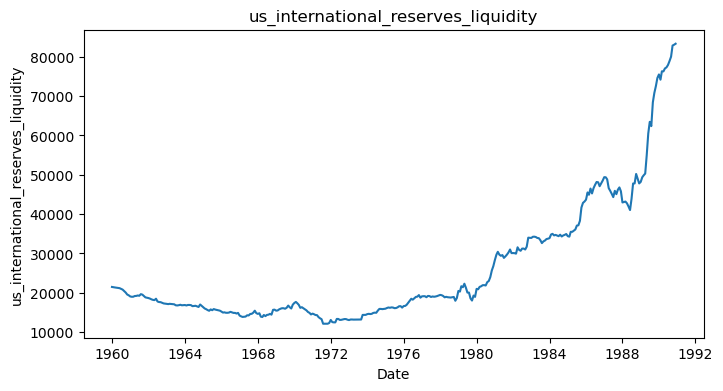

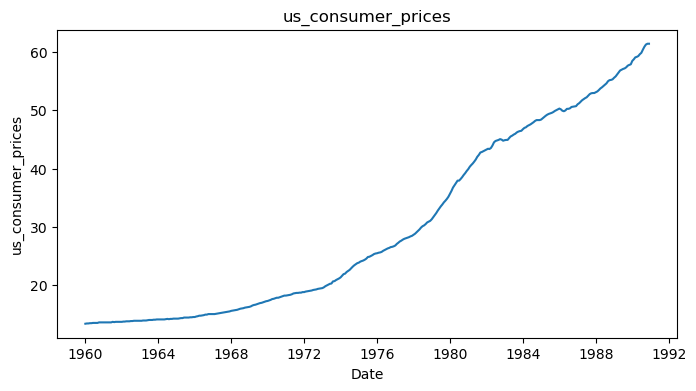

In [64]:
columns = ['spain_industrial_production', 'spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'spain_consumer_prices', 'us_international_reserves_liquidity', 'us_consumer_prices']

for col in columns:
    plt.figure(figsize=(8, 4))
    plt.plot(merged_df['date'], merged_df[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()
    

Conclusion: 
- We found that the flagged data points were either explainable and in line with the general trend of the graph
- We do not observe any datapoints that exhibits extreme behavior which would warrant outlier status
- Hence, we conclude that there no outliers

### 2.3.1 Construct new variables for Spain

In [65]:
# construct a new column for the monthly growth in the nominal exchange rate
merged_df['spain_nominal_exchange_rate_growth'] = merged_df['spain_exchange_rates_per_USD'].pct_change()

# construct a new column for the real exchange rate
# real exchange rate = (nominal exchange rate * foreign (us) price level) / domestic (spain) price level
merged_df['spain_real_exchange_rate'] = (merged_df['spain_exchange_rates_per_USD'] * merged_df['us_consumer_prices']) / merged_df['spain_consumer_prices']

# construct a new column for the monthly growth in the real exchange rate
# real exchange rate growth = (real exchange rate - previous real exchange rate) / previous real exchange rate 
merged_df['spain_real_exchange_rate_growth'] = merged_df['spain_real_exchange_rate'].pct_change()

# construct a new column for the monthly inflation rate
merged_df['spain_inflation_rate'] = merged_df['spain_consumer_prices'].pct_change()

# construct a new column for the monthly growth in industrial production
merged_df['spain_industrial_production_growth'] = merged_df['spain_industrial_production'].pct_change()

# construct a new column for the growth in industrial production vs 12 months ago
merged_df['spain_industrial_production_growth_vs_12_months_ago'] = merged_df['spain_industrial_production'].pct_change(12)

# construct a new column for an index of the value of international reserves, base month January 1960 (value of reserves at January 1960 = 100)
merged_df['spain_international_reserves_liquidity_index'] = (merged_df['spain_international_reserves_liquidity'] / merged_df['spain_international_reserves_liquidity'].iloc[0]) * 100

### 2.3.2 Construct new variables for the US 

In [66]:
# construct a new column for the monthly inflation rate
merged_df['us_inflation_rate'] = merged_df['us_consumer_prices'].pct_change()

# construct a new column for an index of the value of international reserves, base month January 1960 (value of reserves at January 1960 = 100)
merged_df['us_international_reserves_liquidity_index'] = (merged_df['us_international_reserves_liquidity'] / merged_df['us_international_reserves_liquidity'].iloc[0]) * 100

### 2.4 Save merged_df as a CSV file 

In [67]:
merged_df.to_csv('merged_data.csv', index=False)

### 2.5 End product

In [68]:
pd.options.display.max_rows = None
merged_df

,date,spain_industrial_production,spain_exchange_rates_per_USD,spain_international_reserves_liquidity,spain_consumer_prices,us_international_reserves_liquidity,us_consumer_prices,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_production_growth,spain_industrial_production_growth_vs_12_months_ago,spain_international_reserves_liquidity_index,us_inflation_rate,us_international_reserves_liquidity_index
0,1960-01-01,NaN,60.000000,233.000000,2.857368,21478.100000,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000
1,1960-02-01,NaN,60.000000,253.000000,2.855049,21395.700000,13.482806,0.000000,283.346534,0.004228,-0.000811,NaN,NaN,108.583691,0.003413,99.616353
2,1960-03-01,NaN,60.000000,299.000000,2.851573,21344.700000,13.482806,0.000000,283.691987,0.001219,-0.001218,NaN,NaN,128.326180,0.000000,99.378902
3,1960-04-01,NaN,60.000000,326.000000,2.853891,21278.000000,13.528666,0.000000,284.425709,0.002586,0.000813,NaN,NaN,139.914163,0.003401,99.068353
4,1960-05-01,NaN,60.000000,360.000000,2.845198,21234.300000,13.528666,0.000000,285.294743,0.003055,-0.003046,NaN,NaN,154.506438,0.000000,98.864890
5,1960-06-01,NaN,60.000000,406.000000,2.842878,21169.800000,13.574526,0.000000,286.495380,0.004208,-0.000815,NaN,NaN,174.248927,0.003390,98.564584
6,1960-07-01,NaN,60.000000,427.000000,2.841719,20999.400000,13.574526,0.000000,286.612290,0.000408,-0.000408,NaN,NaN,183.261803,0.000000,97.771218
7,1960-08-01,NaN,60.000000,455.000000,2.847516,20803.400000,13.574526,0.000000,286.028803,-0.002036,0.002040,NaN,NaN,195.278970,0.000000,96.858661
8,1960-09-01,NaN,60.000000,479.000000,2.864902,20430.000000,13.574526,0.000000,284.292960,-0.006069,0.006106,NaN,NaN,205.579399,0.000000,95.120146
9,1960-10-01,NaN,60.000000,527.000000,2.872438,20068.200000,13.666246,0.000000,285.462974,0.004116,0.002630,NaN,NaN,226.180258,0.006757,93.435639


## 3. Analysis

### 3.1 Exchange Rate and International Reserve Graphs

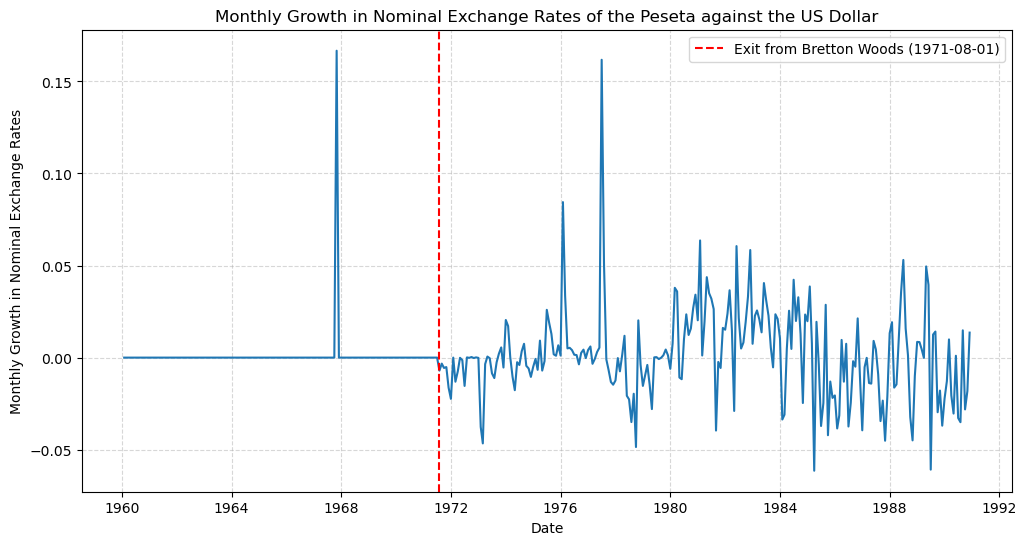

In [69]:
# Plot a time series graph of the monthly growth in nominal exchange rates of the peseta against the US dollar

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['spain_nominal_exchange_rate_growth'])
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.title('Monthly Growth in Nominal Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Nominal Exchange Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/monthly_growth_in_nominal_exchange_rates_of_the_peseta_against_the_us_dollar.png', dpi=300)

plt.show()

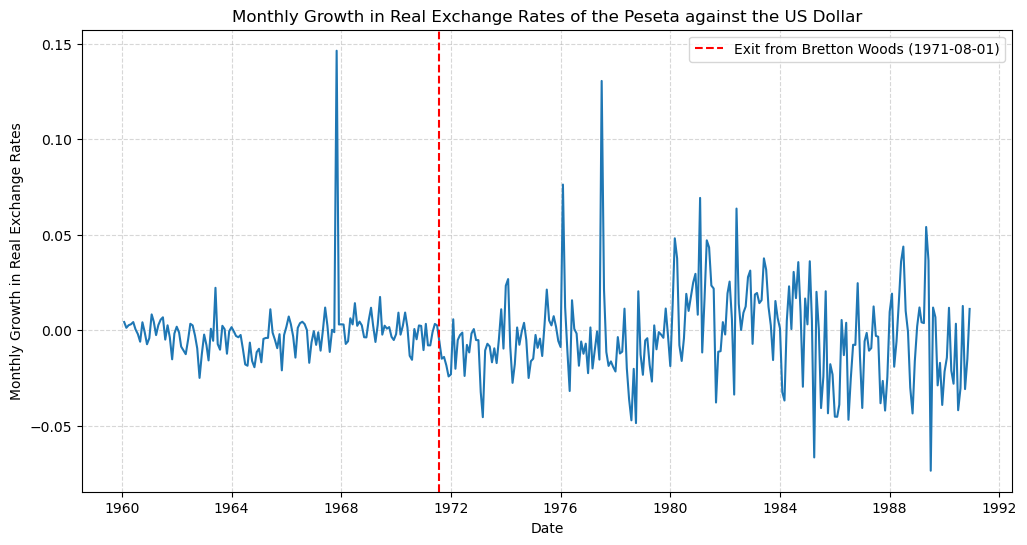

In [70]:
# Plot a time series graph of the monthly growth in real exchange rates of the peseta against the US dollar

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate_growth'])
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.title('Monthly Growth in Real Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Real Exchange Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/monthly_growth_in_real_exchange_rates_of_the_peseta_against_the_us_dollar.png', dpi=300)

plt.show()

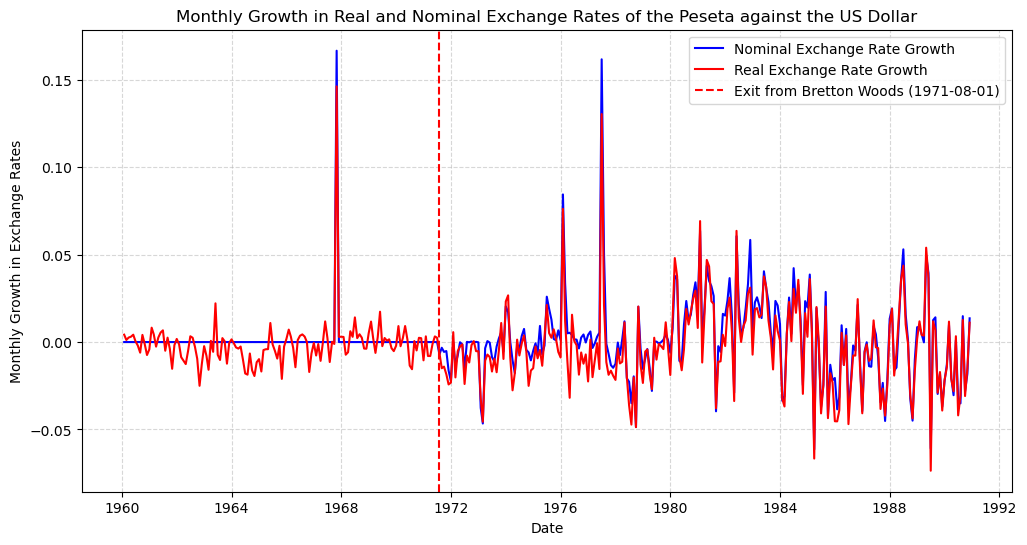

In [71]:
# plot monthly growth in real and nominal exchange rates in the same graph

plt.plot(merged_df['date'], merged_df['spain_nominal_exchange_rate_growth'], label='Nominal Exchange Rate Growth', color='blue')
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate_growth'], label='Real Exchange Rate Growth', color='red')
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.legend()
plt.title('Monthly Growth in Real and Nominal Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Exchange Rates')
plt.gcf().set_size_inches(12, 6)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/monthly_growth_in_real_and_nominal_exchange_rates_of_the_peseta_against_the_us_dollar.png', dpi=300)

plt.show()

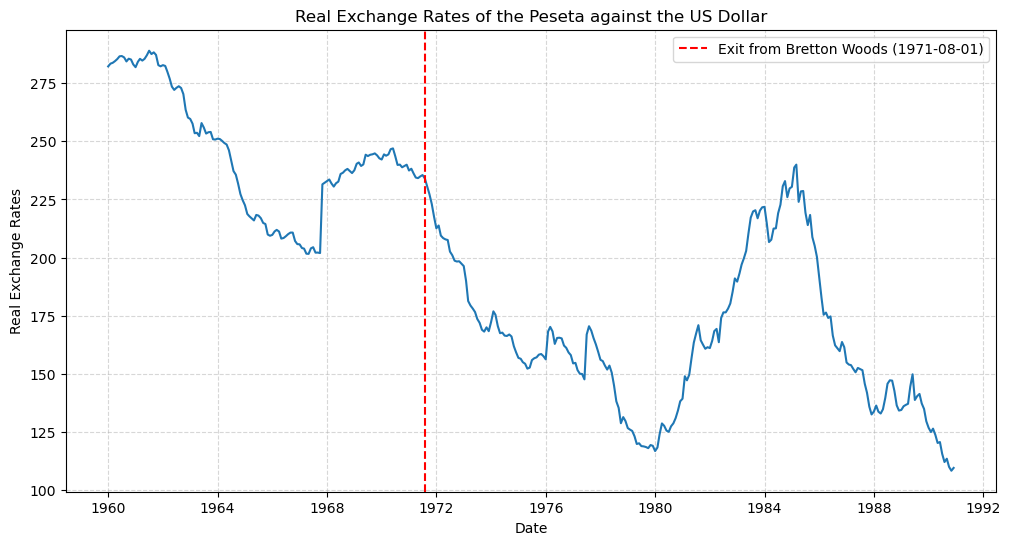

In [72]:
# Plot a time series graph of the real exchange rate level of the Peseta against the US dollar

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate'])
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.title('Real Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Real Exchange Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/real_exchange_rates_of_the_reseta_against_the_us_dollar.png', dpi=300)

plt.show()


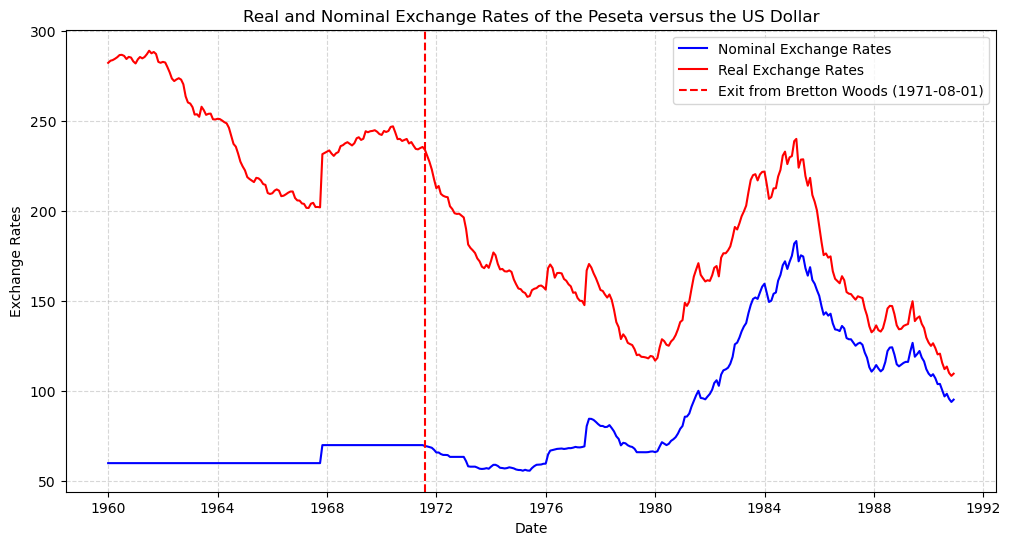

In [73]:
# plot a time series graph of the real and nominal exchange rates in the same graph

plt.plot(merged_df['date'], merged_df['spain_exchange_rates_per_USD'], label='Nominal Exchange Rates', color='blue')
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate'], label='Real Exchange Rates', color='red')
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.legend()
plt.title('Real and Nominal Exchange Rates of the Peseta versus the US Dollar')
plt.xlabel('Date')
plt.ylabel('Exchange Rates')
plt.gcf().set_size_inches(12, 6)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/real_and_nominal_exchange_rates_of_the_peseta_versus_the_us_dollar.png', dpi=300)

plt.show()

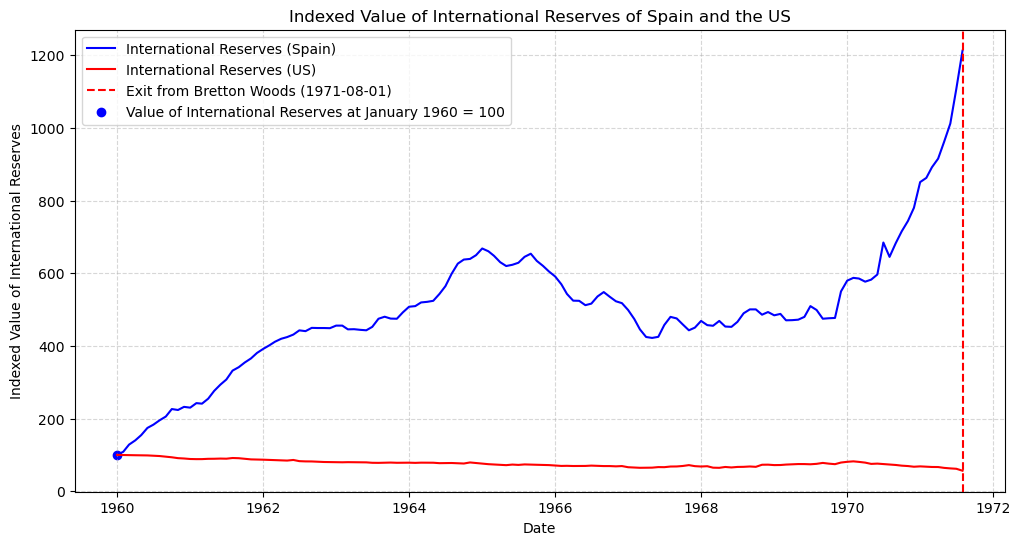

In [74]:
filtered_df = merged_df[(merged_df['date'] >= '1960-01-01') & (merged_df['date'] <= '1971-08-01')]

# Plot a time series graph of the monthly indexed value of international reserves of Spain and the US from January 1960 until August 1971 (when the US exited the Bretton Woods system)

plt.plot(filtered_df['date'], filtered_df['spain_international_reserves_liquidity_index'], label='International Reserves (Spain)', color='blue')
plt.plot(filtered_df['date'], filtered_df['us_international_reserves_liquidity_index'], label='International Reserves (US)', color='red')
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')
# add a point at January 1960
plt.scatter(pd.to_datetime('1960-01-01'), filtered_df['spain_international_reserves_liquidity_index'].iloc[0], color='blue')
# add a point in the legend for January 1960
plt.scatter([], [], color='blue', label='Value of International Reserves at January 1960 = 100')

plt.legend()
plt.title('Indexed Value of International Reserves of Spain and the US')
plt.xlabel('Date')
plt.ylabel('Indexed Value of International Reserves')
plt.gcf().set_size_inches(12, 6)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/indexed_value_of_international_reserves_of_spain_and_the_us.png', dpi=300)

plt.show()

### 3.2 Inflation and Industrial Production Graphs

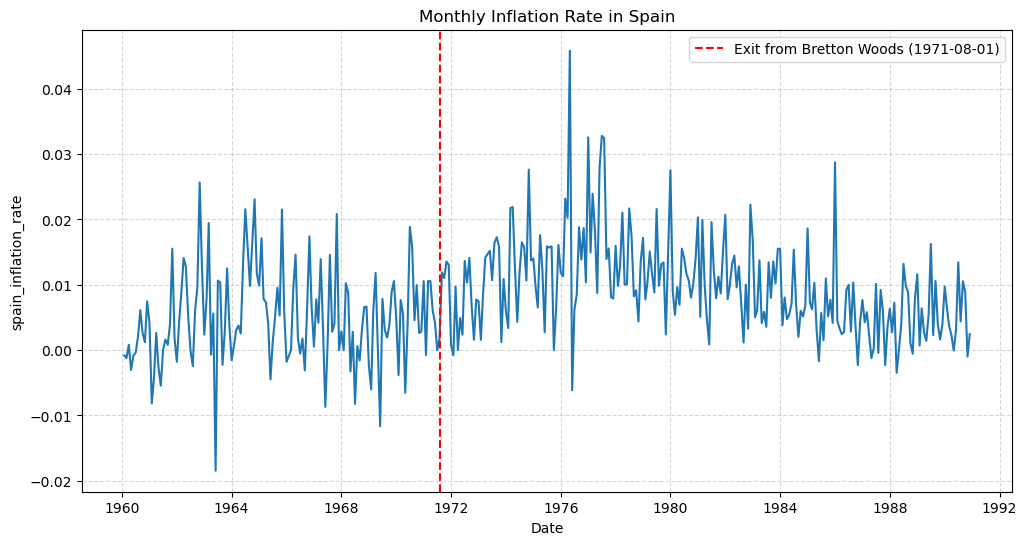

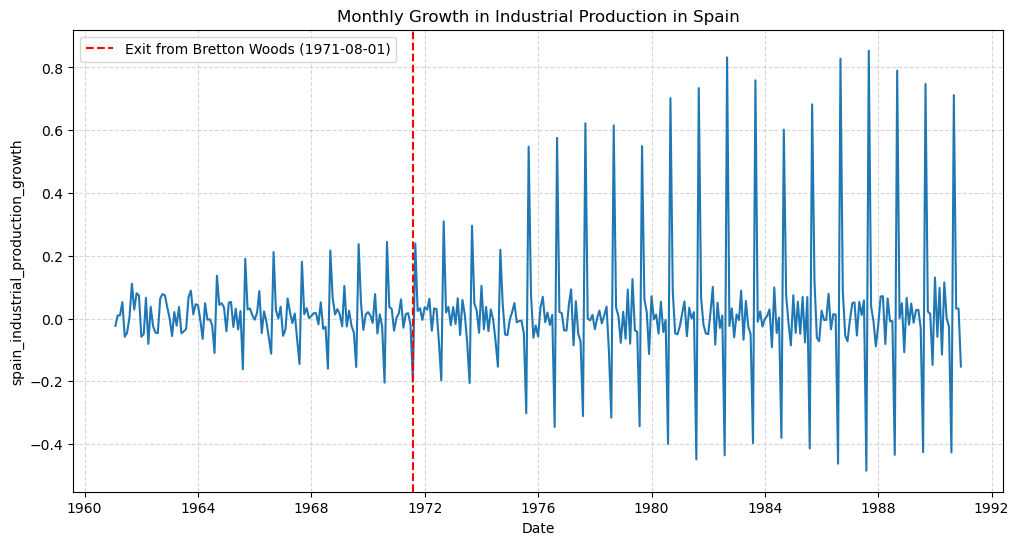

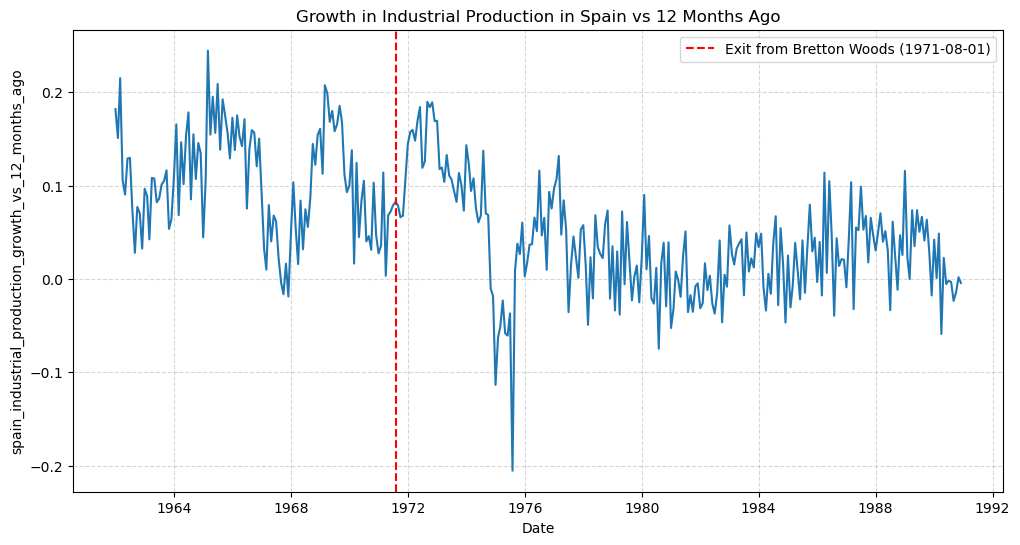

In [75]:
inflation_industrial_production_columns = ['spain_inflation_rate', 'spain_industrial_production_growth', 'spain_industrial_production_growth_vs_12_months_ago']

for col in inflation_industrial_production_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['date'], merged_df[col])
    plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

    # specify the title of each graph
    if col == 'spain_inflation_rate':
        plt.title('Monthly Inflation Rate in Spain')
    elif col == 'spain_industrial_production_growth':
        plt.title('Monthly Growth in Industrial Production in Spain')
    else:
        plt.title('Growth in Industrial Production in Spain vs 12 Months Ago')

    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.savefig(f'plots/{col}.png', dpi=300)

    plt.show()


### 3.3 Comparison Statistics 

In [76]:
# calculate difference in inflation rates between Spain and the US
merged_df["inflation_diff"] = merged_df['spain_inflation_rate'] - merged_df['us_inflation_rate']

In [77]:
sd_columns = ['spain_nominal_exchange_rate_growth', 'spain_real_exchange_rate_growth', 'spain_inflation_rate', 'inflation_diff', 'spain_industrial_production_growth_vs_12_months_ago']

# filter the dataframe for before and after Bretton Woods periods 
before_bw_df = merged_df[merged_df['date'] <= '1971-07-01']
after_bw_df = merged_df[merged_df['date'] >= '1973-01-01']
after_bw_inc_interval_df = merged_df[merged_df['date'] >= '1971-08-01'] # this is to produce a dataframe if we include the interval of 1971-08-01 to 1972-12-01

# calculate the standard deviation for each column before and after Bretton Woods
before_bw_std = before_bw_df[sd_columns].std()
after_bw_std = after_bw_df[sd_columns].std()
after_bw_inc_interval_std = after_bw_inc_interval_df[sd_columns].std()

# calculate the ratio of the standard deviation after and before Bretton Woods
std_ratio = after_bw_std / before_bw_std
std_ratio_inc = after_bw_inc_interval_std / before_bw_std

# create a dataframe to store the standard deviation before and after Bretton Woods and the ratio of the standard deviation
std_df = pd.DataFrame({
    'before_bw_std': before_bw_std,
    'after_bw_std': after_bw_std,
    'std_ratio': std_ratio,
    'after_bw_inc_interval_std': after_bw_inc_interval_std,
    'std_ratio_inc': std_ratio_inc
})

std_df


,before_bw_std,after_bw_std,std_ratio,after_bw_inc_interval_std,std_ratio_inc
spain_nominal_exchange_rate_growth,0.014188,0.025758,1.815514,0.024951,1.758638
spain_real_exchange_rate_growth,0.014802,0.025329,1.711221,0.024594,1.661527
spain_inflation_rate,0.007231,0.007409,1.024708,0.007307,1.010614
inflation_diff,0.007872,0.007479,0.950097,0.007351,0.933734
spain_industrial_production_growth_vs_12_months_ago,0.056866,0.050470,0.887534,0.057681,1.014341


## 4. Conclusion & Extension 

In [78]:
# calculate the average level of nominal exchange rates, real exchange rates, inflation rates, and industrial production before and after Bretton Woods
mean_columns = ['spain_exchange_rates_per_USD', 'spain_real_exchange_rate', 'spain_inflation_rate', 'spain_industrial_production']

before_bw_mean = before_bw_df[mean_columns].mean()
after_bw_mean = after_bw_df[mean_columns].mean()

mean_df = pd.DataFrame({
    'before_bw_mean': before_bw_mean,
    'after_bw_mean': after_bw_mean
})

mean_df

,before_bw_mean,after_bw_mean
spain_exchange_rates_per_USD,63.237410,100.469674
spain_real_exchange_rate,244.277440,161.775894
spain_inflation_rate,0.004846,0.009986
spain_industrial_production,33.401447,80.074445
